✅ Dataset loaded: (32561, 15)

🔍 Data Types:
 age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

🧾 Summary Stats (numerical):
                 age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      

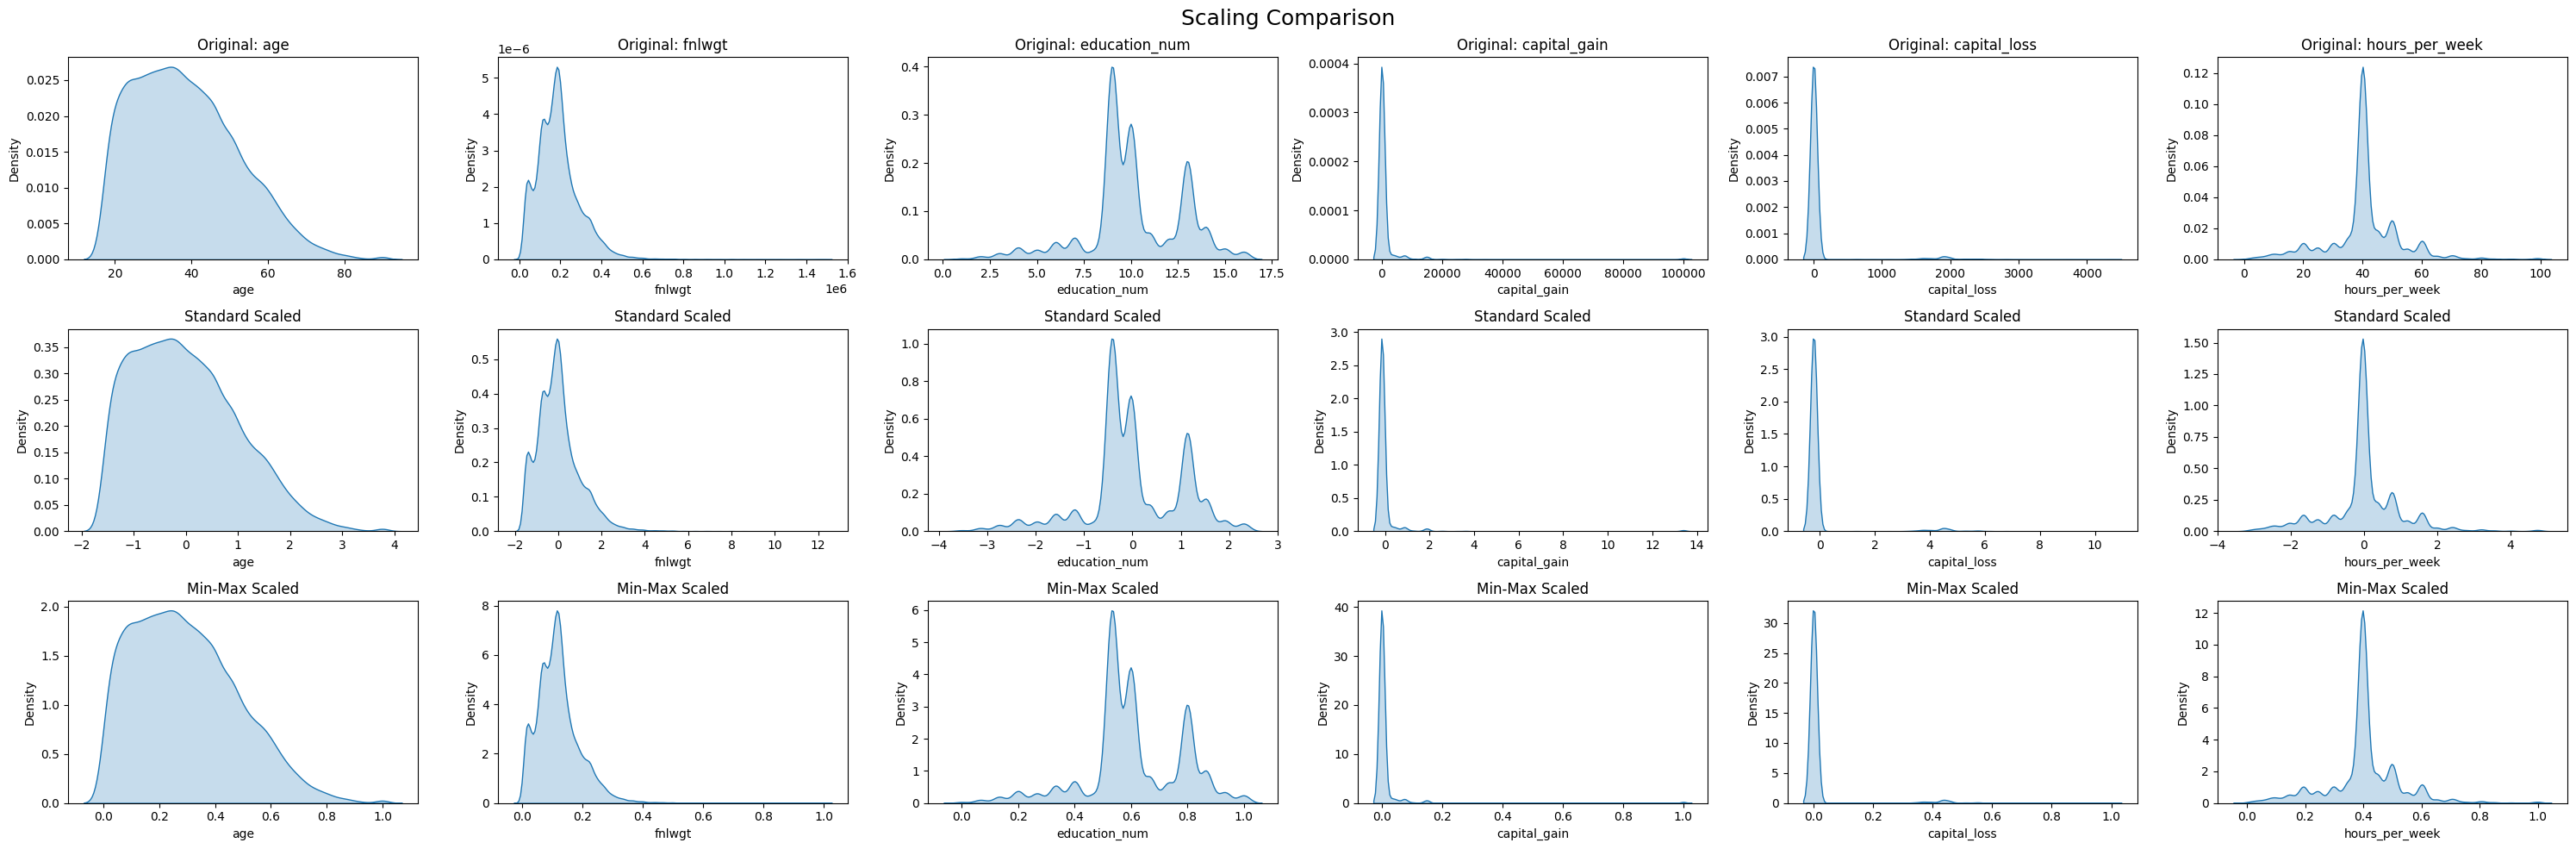


📌 When to use each scaling method:

• Standard Scaling (zero mean, unit variance):
  → Best for distance-based models like SVM, KNN, PCA.
  → Assumes Gaussian (normal-like) distribution.
  → Preserves outliers.

• Min-Max Scaling (0 to 1 range):
  → Useful when features have known minimum/maximum bounds.
  → Best for neural networks and gradient-based methods.
  → Sensitive to outliers (they can shrink most data into small ranges).



In [2]:
# ==============================================================
# TASK 1: DATA EXPLORATION + PREPROCESSING (SCALING)
# ==============================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# --------------------------------------------------------------
# 1️⃣  Load Dataset
# --------------------------------------------------------------
df = pd.read_csv("/content/adult_with_headers.csv")
print("✅ Dataset loaded:", df.shape)

# --------------------------------------------------------------
# 2️⃣  Basic Exploration
# --------------------------------------------------------------
print("\n🔍 Data Types:\n", df.dtypes)
print("\n🧾 Summary Stats (numerical):\n", df.describe())
print("\n❓ Missing Values:\n", df.isnull().sum())

# --------------------------------------------------------------
# 3️⃣  Clean & Impute
# --------------------------------------------------------------
# Handle placeholders like '?' if any (commonly found in Adult dataset)
df.replace("?", np.nan, inplace=True)

# Drop rows with missing values (can be replaced with imputation too)
missing_before = df.isnull().sum().sum()
df.dropna(inplace=True)
missing_after = df.isnull().sum().sum()
print(f"\n🧹 Removed {missing_before - missing_after} rows with missing values.")

# --------------------------------------------------------------
# 4️⃣  Scale Numerical Features
# --------------------------------------------------------------
# Identify numeric columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("\n🔢 Numerical columns:", num_cols)

# Prepare scaled versions
scaler_std = StandardScaler()
scaler_mm  = MinMaxScaler()

df_std = df.copy()
df_mm  = df.copy()

df_std[num_cols] = scaler_std.fit_transform(df[num_cols])
df_mm[num_cols]  = scaler_mm.fit_transform(df[num_cols])

# --------------------------------------------------------------
# 5️⃣  Visualize Original vs Scaled
# --------------------------------------------------------------
fig, axs = plt.subplots(3, len(num_cols), figsize=(5 * len(num_cols), 10))
fig.suptitle("Scaling Comparison", fontsize=18)

for i, col in enumerate(num_cols):
    sns.kdeplot(df[col], ax=axs[0, i], fill=True).set(title=f"Original: {col}")
    sns.kdeplot(df_std[col], ax=axs[1, i], fill=True).set(title="Standard Scaled")
    sns.kdeplot(df_mm[col], ax=axs[2, i], fill=True).set(title="Min-Max Scaled")

plt.tight_layout()
plt.show()

# --------------------------------------------------------------
# 6️⃣  Scaling Discussion
# --------------------------------------------------------------
print("""
📌 When to use each scaling method:

• Standard Scaling (zero mean, unit variance):
  → Best for distance-based models like SVM, KNN, PCA.
  → Assumes Gaussian (normal-like) distribution.
  → Preserves outliers.

• Min-Max Scaling (0 to 1 range):
  → Useful when features have known minimum/maximum bounds.
  → Best for neural networks and gradient-based methods.
  → Sensitive to outliers (they can shrink most data into small ranges).
""")


In [4]:
# ==============================================================
# TASK 2: ENCODING TECHNIQUES — ONE-HOT + LABEL ENCODING
# ==============================================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 1️⃣ Load data
df = pd.read_csv("/content/adult_with_headers.csv")
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)

# 2️⃣ Detect categorical features
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
print(f"🧠 Categorical columns: {cat_cols}")

# 3️⃣ Separate by cardinality
low_card_cols  = [col for col in cat_cols if df[col].nunique() < 5]
high_card_cols = [col for col in cat_cols if df[col].nunique() >= 5]

print(f"\n🟢 One-Hot Encoding (<5 unique): {low_card_cols}")
print(f"🔵 Label Encoding (>=5 unique) : {high_card_cols}")

# 4️⃣ One-Hot Encode low-cardinality columns
df_encoded = pd.get_dummies(df, columns=low_card_cols, drop_first=True)

# 5️⃣ Label Encode high-cardinality columns
le = LabelEncoder()
for col in high_card_cols:
    df_encoded[col] = le.fit_transform(df[col])

# 6️⃣ Display
print("\n✅ Encoding complete.")
print("📐 Original shape:", df.shape)
print("📐 Encoded shape :", df_encoded.shape)

# 7️⃣ Encoding Discussion
print("""
📌 Encoding Discussion:

🔷 One-Hot Encoding:
• Converts categorical values into binary columns (0/1)
• Keeps model interpretability & no ordinal assumption
• Best for: linear models, distance-based models
• ❌ Downside: can increase dimensionality with many categories

🔶 Label Encoding:
• Assigns each category a unique integer (e.g., 'Red'=0, 'Blue'=1)
• Fast and memory-efficient
• Best for: tree-based models (which are not sensitive to magnitude)
• ❌ Risk: imposes an **ordinal relationship** that may not exist

✅ Hybrid approach (used above) avoids overfitting and high dimensionality.
""")


🧠 Categorical columns: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']

🟢 One-Hot Encoding (<5 unique): ['sex', 'income']
🔵 Label Encoding (>=5 unique) : ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']

✅ Encoding complete.
📐 Original shape: (32561, 15)
📐 Encoded shape : (32561, 15)

📌 Encoding Discussion:

🔷 One-Hot Encoding:
• Converts categorical values into binary columns (0/1)
• Keeps model interpretability & no ordinal assumption
• Best for: linear models, distance-based models
• ❌ Downside: can increase dimensionality with many categories

🔶 Label Encoding:
• Assigns each category a unique integer (e.g., 'Red'=0, 'Blue'=1)
• Fast and memory-efficient
• Best for: tree-based models (which are not sensitive to magnitude)
• ❌ Risk: imposes an **ordinal relationship** that may not exist

✅ Hybrid approach (used above) avoids overfitting and high dimensionality.



✅ Added 'net_capital' = capital_gain − capital_loss
✅ Added 'age_edu_interaction' = age × education_num

🔄 Applied log1p to 'capital_gain' → new column 'capital_gain_log'
Skew before: 11.95 | after: 3.10


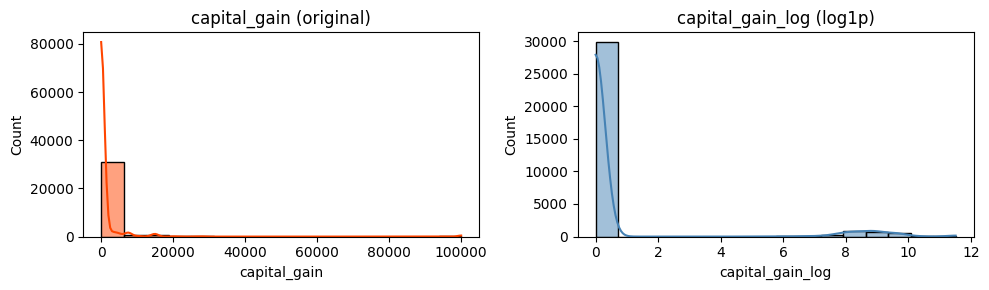


📦 Feature engineering complete.
Added columns: ['net_capital', 'age_edu_interaction', 'capital_gain_log']
DataFrame shape: (32561, 18)


In [9]:
# ==============================================================
# TASK 3 ▸ FEATURE ENGINEERING  –  FINAL SAFE VERSION
# ==============================================================

import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder

# 0⃣ Load + basic clean
df = pd.read_csv("/content/adult_with_headers.csv")
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)

# Normalize headers: lower‑case & replace spaces/dashes with underscores
df.columns = (df.columns.str.lower()
                        .str.strip()
                        .str.replace("[\\s\\-]+", "_", regex=True))

# --------------------------------------------------------------
# 1⃣ Encode categorical columns
cat_cols = df.select_dtypes(include="object").columns
low_card = [c for c in cat_cols if df[c].nunique() < 5]
high_card = [c for c in cat_cols if df[c].nunique() >= 5]

df = pd.get_dummies(df, columns=low_card, drop_first=True)
le = LabelEncoder()
for col in high_card:
    df[col] = le.fit_transform(df[col])

# --------------------------------------------------------------
# 2⃣ New feature: net_capital
gain_col = next((c for c in df.columns if "capital_gain" in c), None)
loss_col = next((c for c in df.columns if "capital_loss" in c), None)
if gain_col and loss_col:
    df["net_capital"] = df[gain_col] - df[loss_col]
    print(f"✅ Added 'net_capital' = {gain_col} − {loss_col}")
else:
    print("⚠️ Skipped net_capital (capital gain/loss columns missing).")

# 3⃣ New feature: age × education_num
age_col = next((c for c in df.columns if "age" in c), None)
edu_col = next((c for c in df.columns if "education_num" in c), None)
if age_col and edu_col:
    df["age_edu_interaction"] = df[age_col] * df[edu_col]
    print("✅ Added 'age_edu_interaction' = age × education_num")
else:
    print("⚠️ Skipped age_edu_interaction (columns missing).")

# --------------------------------------------------------------
# 4⃣ Log1p transform on *most skewed* numeric column
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
skews = df[num_cols].apply(lambda s: skew(s.dropna()))
most_skewed_col = skews.abs().idxmax()

log_col = f"{most_skewed_col}_log"        # new column name
df[log_col] = np.log1p(df[most_skewed_col])

print(f"\n🔄 Applied log1p to '{most_skewed_col}' → new column '{log_col}'")
print(f"Skew before: {skews[most_skewed_col]:.2f} | "
      f"after: {skew(df[log_col]):.2f}")

# Plot before vs after
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.histplot(df[most_skewed_col], ax=ax[0], kde=True, color="orangered")
ax[0].set_title(f"{most_skewed_col} (original)")

sns.histplot(df[log_col], ax=ax[1], kde=True, color="steelblue")
ax[1].set_title(f"{log_col} (log1p)")
plt.tight_layout(); plt.show()

# --------------------------------------------------------------
# 5⃣ Summary
new_cols = ["net_capital", "age_edu_interaction", log_col]
present_cols = [c for c in new_cols if c in df.columns]
print("\n📦 Feature engineering complete.")
print("Added columns:", present_cols)
print("DataFrame shape:", df.shape)


🎯 Target column: workclass
✅ Rows after removing outliers: 31909


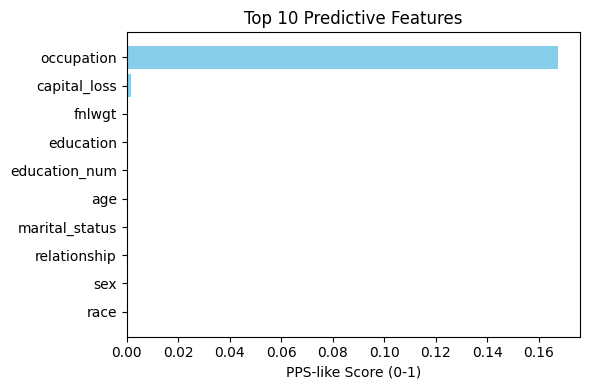

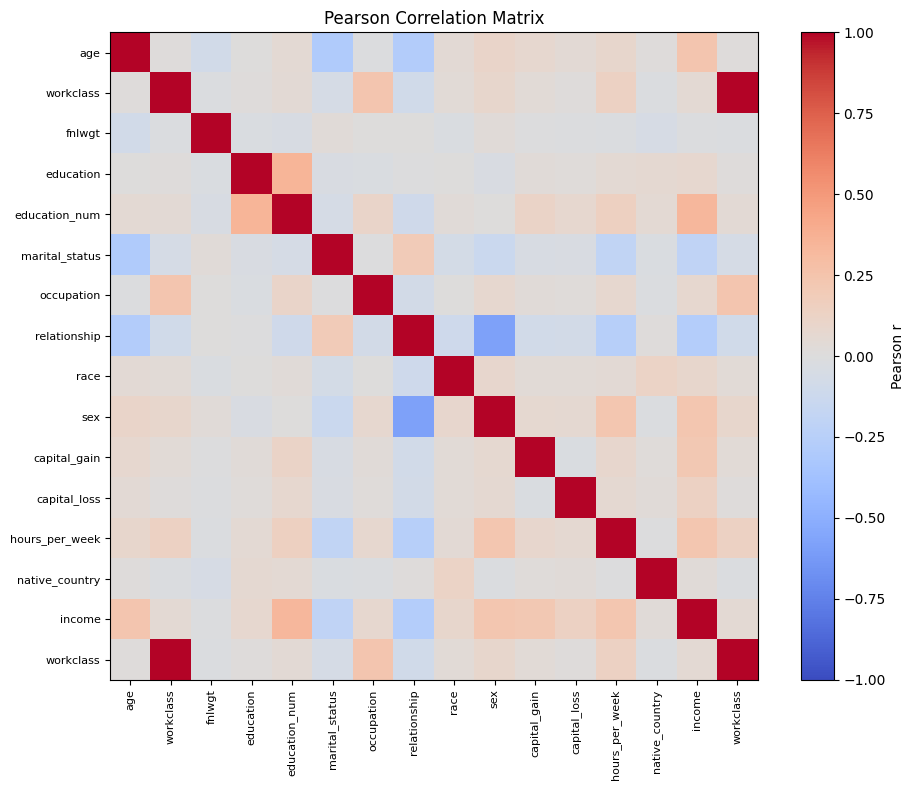


📌 Summary:
• Outliers removed using Isolation Forest (2% contamination).
• PPS-like metric ranks predictive features based on F1-score gain.
• Pearson matrix gives linear relationships between numeric columns.



In [20]:
# ==============================================================
# TASK 4 ▸ Isolation Forest + PPS‑like Feature Ranking
# ==============================================================

# 0️⃣ Install plotting library
!pip install --quiet matplotlib

# 1️⃣ Imports
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder

# 2️⃣ Load dataset (adjust path if needed)
df = pd.read_csv("/content/adult_with_headers.csv")
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)

# Normalize column names
df.columns = df.columns.str.lower().str.strip().str.replace(r"[\s\-]+", "_", regex=True)

# 3️⃣ Detect target column
possible_targets = [c for c in df.columns if any(k in c for k in ["income", "class", "salary"])]
target = possible_targets[0] if possible_targets else df.columns[-1]
print("🎯 Target column:", target)

# Encode target if categorical
if df[target].dtype == "object":
    df[target] = LabelEncoder().fit_transform(df[target])

# 4️⃣ Encode categorical features
cat_cols = [c for c in df.columns if df[c].dtype == "object" and c != target]
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# 5️⃣ Isolation Forest for outlier removal
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
iso = IsolationForest(contamination=0.02, random_state=42)
outlier_flag = iso.fit_predict(df[num_cols])
df_clean = df[outlier_flag == 1].copy()
print("✅ Rows after removing outliers:", df_clean.shape[0])

# 6️⃣ PPS-like Score Calculation (F1 Gain from Decision Tree)
def pps_like(feature, target_col):
    X = df_clean[[feature]].values
    y = df_clean[target_col].values
    majority_class = np.bincount(y).argmax()
    f1_base = f1_score(y, np.full_like(y, majority_class), average="weighted", zero_division=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
    tree = DecisionTreeClassifier(max_depth=3, random_state=42)
    tree.fit(X_train, y_train)
    f1_model = f1_score(y_test, tree.predict(X_test), average="weighted", zero_division=0)
    return max(0, (f1_model - f1_base) / (1 - f1_base + 1e-9))

features = [c for c in df_clean.columns if c != target]
scores = {f: pps_like(f, target) for f in features}
pps_df = pd.DataFrame(scores.items(), columns=["feature", "pps"]).sort_values("pps", ascending=False)

# 7️⃣ Plot Top 10 PPS-like Features
top = pps_df.head(10)
plt.figure(figsize=(6, 4))
plt.barh(top["feature"][::-1], top["pps"][::-1], color="skyblue")
plt.xlabel("PPS-like Score (0‑1)")
plt.title("Top 10 Predictive Features")
plt.tight_layout()
plt.show()

# 8️⃣ Pearson Correlation Matrix (numeric only)
corr = df_clean[num_cols + [target]].corr()
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(label="Pearson r")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90, fontsize=8)
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=8)
plt.title("Pearson Correlation Matrix")
plt.tight_layout()
plt.show()

# ✅ Summary
print("""
📌 Summary:
• Outliers removed using Isolation Forest (2% contamination).
• PPS-like metric ranks predictive features based on F1-score gain.
• Pearson matrix gives linear relationships between numeric columns.
""")
